<a href="https://colab.research.google.com/github/alanwuha/ce7455-nlp/blob/master/PytorchTut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Basics

### Table of contents

  1. Pytorch tensors
  1. Basic autograd example 1
  1. Basic autograd example 2
  1. Loading data from numpy
  1. Input pipeline
  1. Input pipeline for custom dataset
  1. Pretrained model
  1. Save and load model
  1. Train a simple MNIST Neural nets

In [0]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## 0. Pytorch tensors

In [3]:
# Very similar to numpy
x = torch.tensor(1.)
print(x)

x = torch.tensor([1,2,3,4,5]).float()
print(x)
print(x.size())

ran = torch.Tensor(2,5,5).uniform_()
print(ran)

tensor(1.)
tensor([1., 2., 3., 4., 5.])
torch.Size([5])
tensor([[[0.3784, 0.6971, 0.0653, 0.0761, 0.8253],
         [0.1678, 0.9569, 0.4510, 0.4550, 0.2804],
         [0.8672, 0.9844, 0.3930, 0.6631, 0.8681],
         [0.8364, 0.9617, 0.9616, 0.2598, 0.5760],
         [0.5215, 0.3812, 0.7594, 0.8814, 0.2873]],

        [[0.0022, 0.8071, 0.2068, 0.4082, 0.1680],
         [0.1994, 0.1391, 0.4603, 0.6840, 0.5954],
         [0.7994, 0.5741, 0.0375, 0.5115, 0.5344],
         [0.6637, 0.2793, 0.0454, 0.7726, 0.7693],
         [0.4179, 0.3746, 0.1589, 0.5850, 0.9851]]])


In [4]:
# min, max, mean, reshaping
ran = torch.Tensor(2,5,5).uniform_()
print(ran)
print(ran.size())
print(ran.min())
print(ran.max())
print(ran.mean())
rsan = ran.view(5,2,5)
print(rsan)
print(rsan.size())

tensor([[[0.4780, 0.5704, 0.7053, 0.0277, 0.4454],
         [0.4954, 0.9019, 0.3586, 0.2883, 0.8659],
         [0.2419, 0.4684, 0.4270, 0.8000, 0.4375],
         [0.6887, 0.9944, 0.8805, 0.3984, 0.6021],
         [0.0193, 0.1095, 0.4963, 0.5356, 0.9173]],

        [[0.8682, 0.2954, 0.9378, 0.7976, 0.8279],
         [0.9022, 0.5430, 0.3870, 0.2027, 0.0483],
         [0.1101, 0.9955, 0.2643, 0.6726, 0.9655],
         [0.7967, 0.8202, 0.4733, 0.9776, 0.1404],
         [0.1093, 0.2811, 0.9362, 0.0519, 0.7020]]])
torch.Size([2, 5, 5])
tensor(0.0193)
tensor(0.9955)
tensor(0.5452)
tensor([[[0.4780, 0.5704, 0.7053, 0.0277, 0.4454],
         [0.4954, 0.9019, 0.3586, 0.2883, 0.8659]],

        [[0.2419, 0.4684, 0.4270, 0.8000, 0.4375],
         [0.6887, 0.9944, 0.8805, 0.3984, 0.6021]],

        [[0.0193, 0.1095, 0.4963, 0.5356, 0.9173],
         [0.8682, 0.2954, 0.9378, 0.7976, 0.8279]],

        [[0.9022, 0.5430, 0.3870, 0.2027, 0.0483],
         [0.1101, 0.9955, 0.2643, 0.6726, 0.9655]],

   

In [5]:
# Tensor math
x = torch.Tensor(2, 4, 5).uniform_()
y = torch.Tensor(2, 4, 5).uniform_()
print(x.size())
print(y.size())
print(x)
print(y)
a = x + y
m = x * y

# transpose of y (the last 2 dimension)
yt = y.transpose(1, 2)
print(yt.size())
matmul = torch.matmul(x, yt)
print(matmul.size())
print(matmul)

torch.Size([2, 4, 5])
torch.Size([2, 4, 5])
tensor([[[0.4393, 0.5021, 0.5974, 0.3014, 0.5098],
         [0.8365, 0.2973, 0.6080, 0.0072, 0.7159],
         [0.7777, 0.0919, 0.3391, 0.4479, 0.0889],
         [0.6662, 0.7987, 0.8528, 0.5594, 0.9429]],

        [[0.4225, 0.6012, 0.8973, 0.2096, 0.9488],
         [0.3488, 0.6753, 0.0139, 0.4483, 0.0123],
         [0.6800, 0.2383, 0.0751, 0.7912, 0.1911],
         [0.5733, 0.6164, 0.3023, 0.8783, 0.8546]]])
tensor([[[0.9117, 0.8325, 0.6987, 0.5551, 0.3136],
         [0.0853, 0.1126, 0.3778, 0.9071, 0.4562],
         [0.6096, 0.7952, 0.2501, 0.6239, 0.2696],
         [0.1361, 0.4529, 0.3692, 0.4763, 0.9199]],

        [[0.0748, 0.7551, 0.7669, 0.0061, 0.6848],
         [0.7760, 0.1273, 0.9288, 0.0183, 0.9924],
         [0.1788, 0.4243, 0.8222, 0.8170, 0.0348],
         [0.6496, 0.8241, 0.5408, 0.0493, 0.3360]]])
torch.Size([2, 5, 4])
torch.Size([2, 4, 4])
tensor([[[1.5631, 0.8257, 1.1421, 1.1203],
         [1.6635, 0.6676, 1.0960, 1.1349],
  

## 1. Basic autograd example 1

In [6]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad) # x.grad = 2
print(w.grad) # w.grad = 1
print(b.grad) # b.grad = 1

tensor(2.)
tensor(1.)
tensor(1.)


## 2. Basic autograd example 1

In [7]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print('w: ', linear.weight)
print('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print('dL/dw: ', linear.weight.grad)
print('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.3920, -0.3873, -0.0325],
        [-0.5596, -0.3377,  0.3804]], requires_grad=True)
b:  Parameter containing:
tensor([-0.0812,  0.3334], requires_grad=True)
loss:  1.8495737314224243
dL/dw:  tensor([[ 0.4659, -0.5993, -0.3919],
        [-0.5142, -0.5282,  0.9056]])
dL/db:  tensor([-0.5098,  0.4889])
loss after 1 step optimization:  1.823793649673462


## 3. Loading data from numpy

In [0]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

## 4. Input pipeline

In [15]:
# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print(len(train_dataset))
print(train_dataset[0])
print(type(train_dataset[0]))
print(image.size())
print(label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(
    dataset = train_dataset,
    batch_size = 64,
    shuffle = True
)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
  # Training code should be written here.
  pass


Files already downloaded and verified
50000
(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0

## 5. Input pipeline for custom dataset

In [0]:
# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self):
    # TODO
    # 1. Intialize file paths or a list of file names.
    pass
  def __getitem__(self, index):
    # TODO
    # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
    # 2. Preprocess the data (e.g. torchvision.Transform).
    # 3. Return a data pair (e.g. image and label).
    pass
  def __len__(self):
    # You should change 0 to the total size of your dataset.
    return 0

# You can then use the prebuilt data loader.
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(
    dataset = custom_dataset,
    batch_size = 64,
    shuffle = True
)

## 6. Pretrained model

In [0]:
# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
  param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100) # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
output = resnet(images)
print(outputs.size()) # (64, 100)

## 7. Save and load model

In [0]:
# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

## 8. Train a simple MNIST Neural nets

Let's train a simple neural network to classify MNIST hand-written digit.

### 1. Download the data

In [16]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='.',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='.',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


0it [00:00, ?it/s]


 95%|█████████▌| 9428992/9912422 [00:02<00:00, 1357246.64it/s]
9920512it [00:02, 3583641.78it/s]                             

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



0it [00:00, ?it/s]


 57%|█████▋    | 16384/28881 [00:00<00:00, 86051.87it/s]
32768it [00:00, 57007.80it/s]                           
0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



 60%|█████▉    | 983040/1648877 [00:01<00:01, 359025.11it/s]
1654784it [00:01, 966783.61it/s]                            
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]
8192it [00:00, 21523.51it/s]            

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


torch.Size([28, 28]) , Label: 7


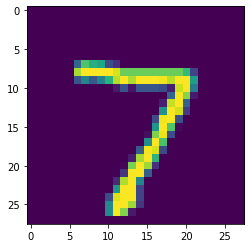

In [19]:
image, label = test_dataset[0]

# reduce batch=1 to no batch
image = image[0]
print(f'{image.size()} , Label: {label}')
plt.imshow(image)

## 2. Initiate the Neural Network (multi-layer perceptron)

The network has 2 layers, with ReLu activation in between

In [0]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

### 3. Train the network

In [23]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # Move tensors to the configured device
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
        .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.3200
Epoch [1/5], Step [200/600], Loss: 0.3016
Epoch [1/5], Step [300/600], Loss: 0.2120
Epoch [1/5], Step [400/600], Loss: 0.2577
Epoch [1/5], Step [500/600], Loss: 0.1806
Epoch [1/5], Step [600/600], Loss: 0.1343
Epoch [2/5], Step [100/600], Loss: 0.1547
Epoch [2/5], Step [200/600], Loss: 0.0643
Epoch [2/5], Step [300/600], Loss: 0.1617
Epoch [2/5], Step [400/600], Loss: 0.1355
Epoch [2/5], Step [500/600], Loss: 0.1319
Epoch [2/5], Step [600/600], Loss: 0.1163
Epoch [3/5], Step [100/600], Loss: 0.1382
Epoch [3/5], Step [200/600], Loss: 0.0520
Epoch [3/5], Step [300/600], Loss: 0.0687
Epoch [3/5], Step [400/600], Loss: 0.0500
Epoch [3/5], Step [500/600], Loss: 0.1058
Epoch [3/5], Step [600/600], Loss: 0.0523
Epoch [4/5], Step [100/600], Loss: 0.0364
Epoch [4/5], Step [200/600], Loss: 0.1530
Epoch [4/5], Step [300/600], Loss: 0.0860
Epoch [4/5], Step [400/600], Loss: 0.0233
Epoch [4/5], Step [500/600], Loss: 0.0422
Epoch [4/5], Step [600/600], Loss:

## 4. Test the network

In [25]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.pt')

Accuracy of the network on the 10000 test images: 97.9 %
